# Twitter Scrap - BlackLivesMatter

##### In this project, we will try to scrap 3000 tweets containing "George Floyd's" name from May 26 to June 7.  We will try to analyze the majority of words used in these tweets and the sentiment behind it

In [1]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got

In [28]:
text_query = "George Floyd"
count = 3000

#### According to reports BlackLivesMatter was used roughly 47.8 million times on Twitter – an average of just under 3.7 million times per day – from May 26 to June 7.

In [43]:
# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setMaxTweets(count).setSince("2020-05-26").setUntil("2020-06-07")
print("\n Tweet Criteria Created \n")


 Tweet Criteria Created 



In [44]:
%%time
# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)


Wall time: 3min 32s


In [45]:
# Creating list of chosen tweet data
text_tweets = [[tweet.date, tweet.text,tweet.id,tweet.username] for tweet in tweets]
print("\n We have scraped tweet \n")


 We have scraped tweet 



In [46]:
tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text','TweetID','username'])


In [47]:
tweets_df.to_csv("BLM_Tweet.csv")

In [48]:
df_BLM = pd.read_csv("BLM_Tweet.csv" ,  encoding = 'ISO-8859-1')


In [49]:
df_BLM.head()

,Unnamed: 0,Datetime,Text,TweetID,username
0,0,2020-06-06 23:59:59+00:00,There is no institutional racism in the police...,1269418791362011136,DiggyChipp
1,1,2020-06-06 23:59:58+00:00,#WeveSeenEnough #AbolishThePolice Lead @Speake...,1269418790485471232,cAlabaZa04901Je
2,2,2020-06-06 23:59:58+00:00,Very unfortunate what happened and my condolen...,1269418789893894145,fellaGonzz
3,3,2020-06-06 23:59:58+00:00,Do you guys realize George Floyd encountered o...,1269418789122084864,SharikaSoal84
4,4,2020-06-06 23:59:58+00:00,SOLIDAS Y MUY CONCURRIDAS LAS MANIFESTACIONES ...,1269418786953793541,barricada_azul1


In [50]:
df_BLM.dtypes

Unnamed: 0     int64
Datetime      object
Text          object
TweetID        int64
username      object
dtype: object

In [51]:
Check_Null = df_BLM.isnull()
for column in Check_Null.columns.values.tolist():
    print(column)
    print (Check_Null[column].value_counts())
    print("")

Unnamed: 0
False    3000
Name: Unnamed: 0, dtype: int64

Datetime
False    3000
Name: Datetime, dtype: int64

Text
False    3000
Name: Text, dtype: int64

TweetID
False    3000
Name: TweetID, dtype: int64

username
False    3000
Name: username, dtype: int64



In [52]:
df1 = df_BLM.dropna(axis=0, how = 'any', thresh= None,subset = ["Text"], inplace= True)

In [53]:
def gen_freq(Text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in Text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df_BLM.Text.str)

George            2278
the               2221
Floyd             1435
a                 1350
to                1340
                  ... 
hoax...              1
arranged             1
Couple               1
'retribution';       1
MOCKS                1
Length: 16741, dtype: int64

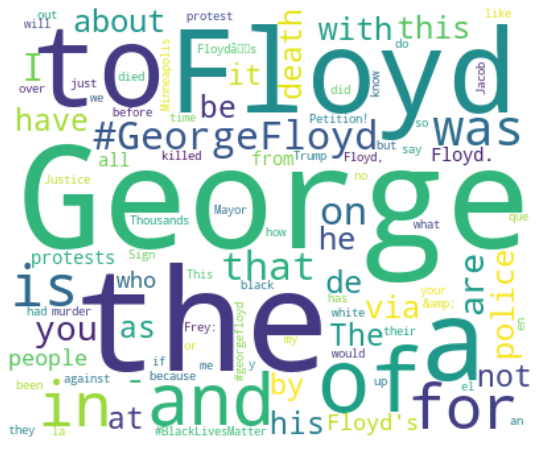

In [54]:
from wordcloud import WordCloud



#Generate word frequencies
word_freq = gen_freq(df_BLM.Text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
import re

def clean_text(Text):
    #Remove RT
    Text = re.sub(r'RT', '', Text)
    
    #Fix &
    Text = re.sub(r'&amp;', '&', Text)
    
    #Remove punctuations
    Text = re.sub(r'[?!.;:,#@-]', '', Text)

    #Convert to lowercase to maintain consistency
    Text = Text.lower()
    return Text

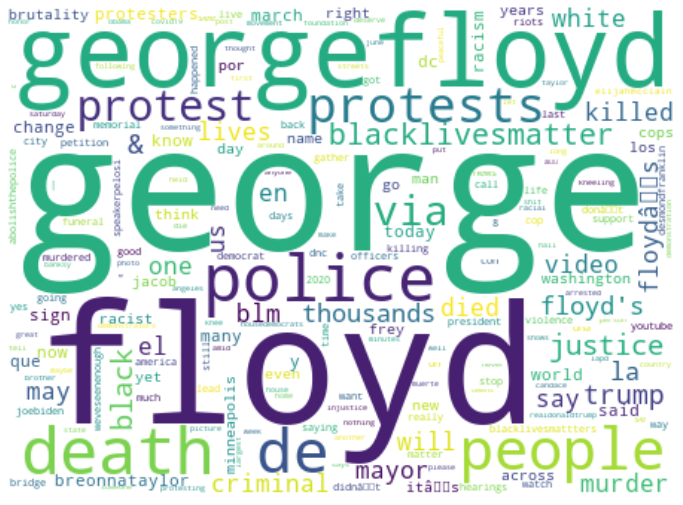

In [56]:

from wordcloud import STOPWORDS
Text = df_Tweet.Text.apply(lambda x: clean_text(x))
word_freq = gen_freq(Text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

###### Analysing the wordcloud, we could see people talk about PROTESTS, PETITION, POLICE,RIOTS etc.